In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [2]:
import seaborn as sns

In [79]:
df = loadmat("Matlab_accidents.mat")
data=df['accidents']
    
headers=data[0][0][3][0]
heads = []
for i in list(headers) :
    heads.append(i[0])
    
body=data[0][0][2]
    
df=pd.DataFrame(body, columns=heads)
df1=df.iloc[:,[3,6]]
    
train_data, test_data= train_test_split (df1, train_size=0.7, test_size=0.3, shuffle=True)

<AxesSubplot:>

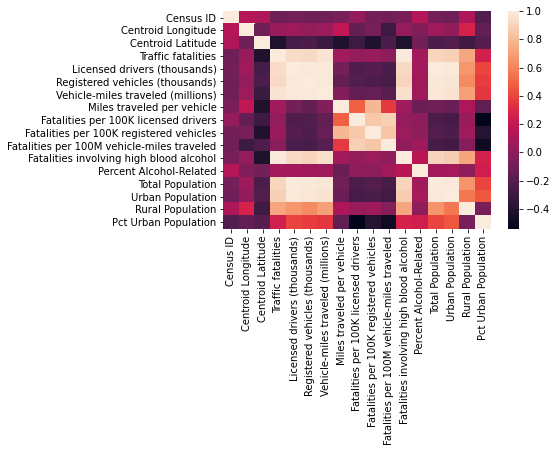

In [80]:
sns.heatmap(df.corr())

In [81]:
X_train=np.asarray(train_data.iloc[:,0]).reshape(X_train.shape[0],1)
Y_train=np.asarray(train_data.iloc[:,1]).reshape(Y_train.shape[0],1)
X_test=np.asarray(test_data.iloc[:,0]).reshape(X_test.shape[0],1)
Y_test=np.asarray(test_data.iloc[:,1]).reshape(Y_test.shape[0],1)

In [82]:
X_train.shape

(35, 1)

In [83]:
ones=np.ones(X_train.shape)
X_train=np.concatenate((ones,X_train),axis=1)

In [84]:
ones=np.ones(X_test.shape)
X_test=np.concatenate((ones,X_test),axis=1)

In [85]:
np.dot(X_train.T,X_train)

array([[3.5000000e+01, 2.9797000e+04],
       [2.9797000e+04, 4.7466743e+07]])

In [86]:
W=np.dot(np.dot(np.linalg.inv(np.dot(X_train.T,X_train)),X_train.T),Y_train)

In [87]:
W

array([[5458.31893863],
       [  64.22958141]])

In [88]:
Y_pred=np.dot(X_test,W)

In [146]:
mse=np.sum((Y_pred-Y_test)**2)/len(Y_test)

In [147]:
mse

384490590.88443494

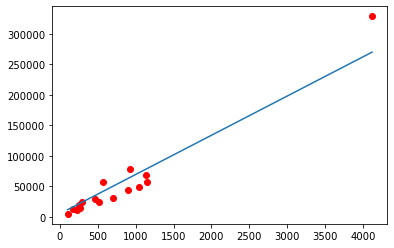

In [91]:
plt.figure()
plt.scatter(X_test[:,1], Y_test,marker='o',color='red')
plt.plot([min(X_test[:,1]),max(X_test[:,1])],[min(Y_pred),max(Y_pred)])

In [131]:
L=0.01
iter = 50
T=1e-6
curr_w = 0.1
curr_b=0.01

In [132]:
n=len(X_train)


In [94]:
X_train.shape

(35, 2)

In [143]:
costs=[]
weights=[]
prev_mse=None

for i in range(0,iter):
    y_pred=curr_w*X_train + curr_b
    print(y_pred)
    mse=np.mean((Y_train-y_pred)**2)
    print("curr",mse)
    if prev_mse and abs(prev_mse-mse)<=T:
        break
    
    prev_mse=mse
    costs.append(mse)
    weights.append(curr_w)
        
    del_w = (-2/n)*np.sum(X_train * (Y_train - y_pred))
    del_b= (-2/n)*np.sum (Y_train - y_pred)
    curr_w= curr_w - L*del_w
    curr_b= curr_b - L*del_b

[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
curr nan
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
curr nan
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 

In [134]:
weights

[0.1,
 1833582.086788571,
 -49730219021.26595,
 1348826956466652.2,
 -3.658407688276769e+19,
 9.922656682887936e+23,
 -2.6913106475795245e+28,
 7.299610611607737e+32,
 -1.979864908163553e+37,
 5.3699645955691944e+41,
 -1.4564892603917245e+46,
 3.950418904785304e+50,
 -1.0714675313903738e+55,
 2.90612894099183e+59,
 -7.882259773855216e+63,
 2.137896163730842e+68,
 -5.798590934614135e+72,
 1.5727450845092773e+77,
 -4.265738226303583e+81,
 1.1569912247428991e+86,
 -3.1380938611698277e+90,
 8.511415532732367e+94,
 -2.30854134948761e+99,
 6.261429890009404e+103,
 -1.698280356823801e+108,
 4.60622608739175e+112,
 -1.2493413518513445e+117,
 3.3885740383394205e+121,
 -9.190790008105156e+125,
 2.4928072993937183e+130,
 -6.761212285810618e+134,
 1.8338357555722278e+139,
 -4.973891421029344e+143,
 1.3490627932745045e+148,
 -3.659047345711794e+152,
 9.924391618319751e+156,
 -2.6917812121016817e+161,
 7.300886918295884e+165,
 -1.9802110793442317e+170,
 5.370903511641998e+174,
 -1.4567439215076607e+

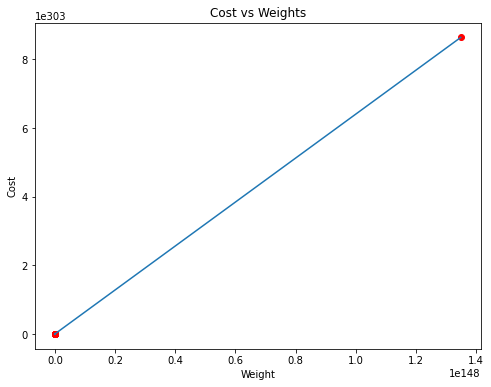

In [135]:
plt.figure(figsize = (8,6))
plt.plot(weights, costs)
plt.scatter(weights, costs, marker='o', color='red')
plt.title("Cost vs Weights")
plt.ylabel("Cost")
plt.xlabel("Weight")
plt.show()